In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz

In [3]:
dataset = pd.get_dummies(pd.read_csv("./ManualPreprocessedAmesHousingClassification.csv"))
dataset.head()

,Unnamed: 0,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,20,141,31770,6,5,1960,112,639,0,...,0,0,0,1,0,0,0,0,1,0
1,1,20,80,11622,5,6,1961,0,468,144,...,0,0,0,1,0,0,0,0,1,0
2,2,20,81,14267,6,6,1958,108,923,0,...,0,0,0,1,0,0,0,0,1,0
3,3,20,93,11160,7,5,1968,0,1065,0,...,0,0,0,1,0,0,0,0,1,0
4,4,60,74,13830,5,5,1997,0,791,0,...,0,0,0,1,0,0,0,0,1,0


In [4]:
# using kFold cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=100, shuffle=True)
kf.get_n_splits(dataset)

10

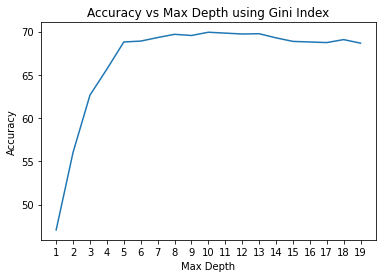

In [14]:
depth = range(1,20)
accuracy = []
for max_d in depth:
    avg_accuracy = 0
    for train, test in kf.split(dataset):
        train_data = dataset.iloc[train]
        test_data = dataset.iloc[test]
        dt = DecisionTreeClassifier(criterion='gini', max_depth=max_d, random_state=100)
        dt.fit(train_data.drop('SalePrice', axis=1), train_data['SalePrice'])
        y_pred = dt.predict(test_data.drop('SalePrice', axis=1))
        # find average
        avg_accuracy += accuracy_score(test_data['SalePrice'], y_pred)
    accuracy.append(avg_accuracy/10*100)
plt.plot(depth, accuracy)
plt.xticks(depth)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth using Gini Index')
plt.show()

In [15]:
avg_accuracy = 0
print("10 Fold Cross Validation Using Gini Index, Max Depth 10")
for train, test in kf.split(dataset):
    train_data = dataset.iloc[train]
    test_data = dataset.iloc[test]
    dt = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=100)
    dt.fit(train_data.drop('SalePrice', axis=1), train_data['SalePrice'])
    y_pred = dt.predict(test_data.drop('SalePrice', axis=1))
    # find average
    avg_accuracy += accuracy_score(test_data['SalePrice'], y_pred)
    # print("\tAccuracy is ", accuracy_score(test_data['SalePrice'], y_pred)*100)
print("\nAverage accuracy is ", avg_accuracy/10*100)

10 Fold Cross Validation Using Gini Index, Max Depth 10

Average accuracy is  69.93174061433447


In [16]:
avg_accuracy = 0
print("10 Fold Cross Validation Using Entropy, Max Depth 10")
for train, test in kf.split(dataset):
    train_data = dataset.iloc[train]
    test_data = dataset.iloc[test]
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=100)
    dt.fit(train_data.drop('SalePrice', axis=1), train_data['SalePrice'])
    y_pred = dt.predict(test_data.drop('SalePrice', axis=1))
    # find average
    avg_accuracy += accuracy_score(test_data['SalePrice'], y_pred)
    # print("\tAccuracy is ", accuracy_score(test_data['SalePrice'], y_pred)*100)
print("\nAverage accuracy is ", avg_accuracy/10*100)

10 Fold Cross Validation Using Entropy, Max Depth 10

Average accuracy is  68.9419795221843


In [27]:
# Best Max Depth is 10, using Gini Index
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=100)
dt.fit(train_data.drop('SalePrice', axis=1), train_data['SalePrice'])
y_pred = dt.predict(test_data.drop('SalePrice', axis=1))
print("Accuracy is ", accuracy_score(test_data['SalePrice'], y_pred)*100)

Accuracy is  71.33105802047781


In [33]:
class_names = ['0', '1', '2', '3']
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names = train_data.drop('SalePrice', axis=1).columns,
                                class_names = class_names,
                                filled = True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data) 
graph.render("dt-max10-gini")

'dt-max10-gini.pdf'